# Customer Churn Prediction

## 📌 Project Overview

Customer churn is when customers stop using a company’s product or service.
For businesses (like telecom, banking, or SaaS), predicting churn is critical because:
- Retaining existing customers is cheaper than acquiring new ones.

- Early detection helps businesses take preventive actions (discounts, offers, better support).

In this project, we build a Machine Learning model that predicts whether a customer is likely to churn based on their demographics, services, billing info, and contract details.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step 3: EDA (Exploratory Data Analysis).

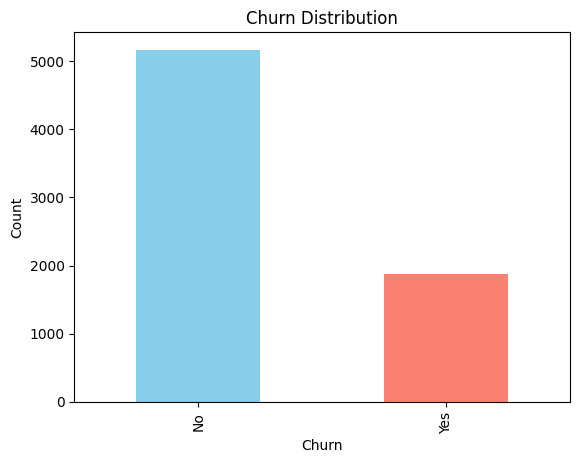

In [15]:
# Step 3.1 — Target Column (Churn Distribution)
# Count of churned vs non-churned customers

df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


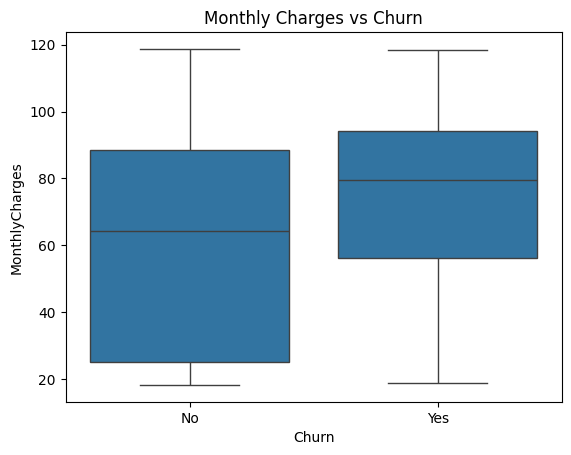

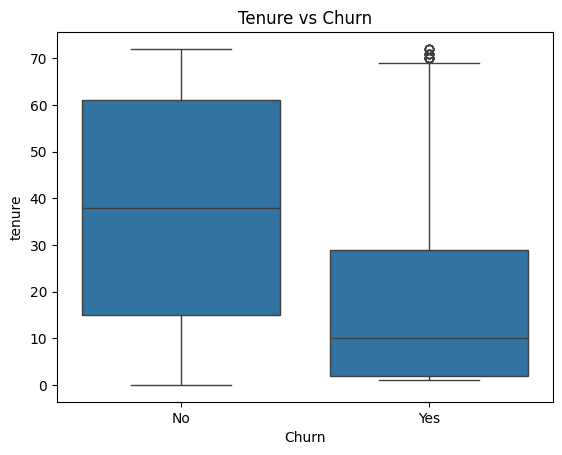

In [20]:
#Step 3.2 — Numerical Features
# Compare Monthly Charges by churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

# Compare Tenure by churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

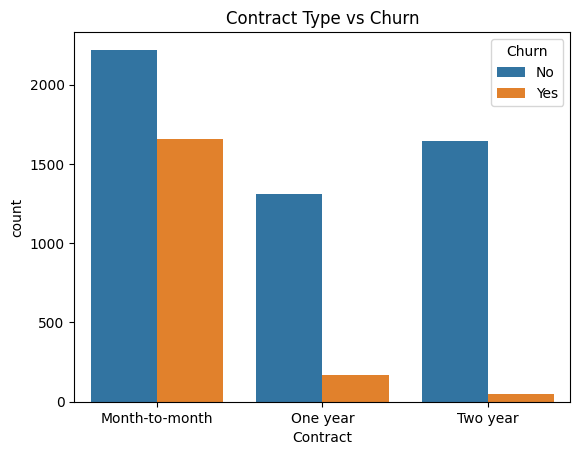

In [19]:
#Step 3.3 — Categorical Features
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()


### Step 4: Data Preprocessing

In [23]:
# Convert TotalCharges to numeric (some values may be spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
                                   

In [24]:
# CustomerID is just an identifier, drop it
df = df.drop('customerID', axis=1)

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode binary columns (Yes/No)
binary_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode gender separately
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Encode multi-category columns using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']]
)


In [27]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Step 5 – Model Building

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(random_state=42, max_iter=1000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))    

Accuracy: 0.8048261178140526

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Confusion Matrix:
 [[925 110]
 [165 209]]


**<U> Key Insights </u>**

- Your model is much better at predicting "No churn" than "Yes churn".

- This imbalance is common in churn problems since companies usually have more non-churn customers than churners.

- Missing churners (false negatives = 165) is risky in real business → because these are customers who will leave but we didn’t catch them.

### Step 6: Try Multiple Models & Compare.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.7877927608232789
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[928 107]
 [192 182]]


In [32]:
# 2. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Results
Accuracy: 0.7856635911994322
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[906 129]
 [173 201]]


C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:22:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**<U>  Insights </U>**

- All three models are good at predicting customers who stay (Class 0).

- All three models struggle with predicting customers who churn (Class 1) — recall for Class 1 is low (0.49–0.56).

- This happens because the dataset is imbalanced: more customers stay than churn.

- Logistic Regression slightly outperformed Random Forest and XGBoost in terms of overall accuracy and recall for churn customers.

### Step 7: Fixing Class Imbalance

In [42]:
# Step 1: Import required libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [43]:
# Step 2: Apply SMOTE on training data
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))

# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)
print("\nLogistic Regression (after SMOTE)")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest (after SMOTE)")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# --- XGBoost ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost (after SMOTE)")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Before SMOTE: Counter({0: 4139, 1: 1495})
After SMOTE: Counter({0: 4139, 1: 4139})

Logistic Regression (after SMOTE)
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.50      0.70      0.58       374

    accuracy                           0.73      1409
   macro avg       0.69      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409

Confusion Matrix:
 [[769 266]
 [111 263]]

Random Forest (after SMOTE)
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1035
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.76      1409

Confusion Matrix:
 [[834 201]
 [138 236]]

XGBoost (after SMOTE)
              precision    recall  f1-score   support

           0       0.86      0.78    

C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:40:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**<u>📊 Key Insights</u>**

Before SMOTE, recall for churners was ~0.56 (many churners missed).

After SMOTE, recall improved across models (0.63–0.70).

Random Forest seems the best tradeoff here (good accuracy + balanced precision/recall).

### Step 7: Hyperparameter Tuning (Random Forest & XGBoost)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,            # number of random combinations to try
    cv=5,                 # 5-fold CV
    scoring='f1',         # optimize for churn class
    n_jobs=-1,
    random_state=42
)

# Fit on SMOTE resampled data
rf_random.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", rf_random.best_params_)
print("Best CV F1 Score:", rf_random.best_score_)


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best CV F1 Score: 0.850851046804757


In [45]:
# Train with best parameters
best_rf = rf_random.best_estimator_

# Predict on test data
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Random Forest (Tuned) Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest (Tuned) Results:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409

Confusion Matrix:
 [[829 206]
 [131 243]]


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression with grid search
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # both support l1/l2
}

grid_log = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_log.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_log.best_params_)
print("Best CV F1 Score:", grid_log.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best CV F1 Score: 0.7968899086313501


In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb, param_dist, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_xgb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_xgb.best_params_)
print("Best CV F1 Score:", grid_xgb.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:01:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Best CV F1 Score: 0.844955383840359



📌 Random Forest (Tuned) Results:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



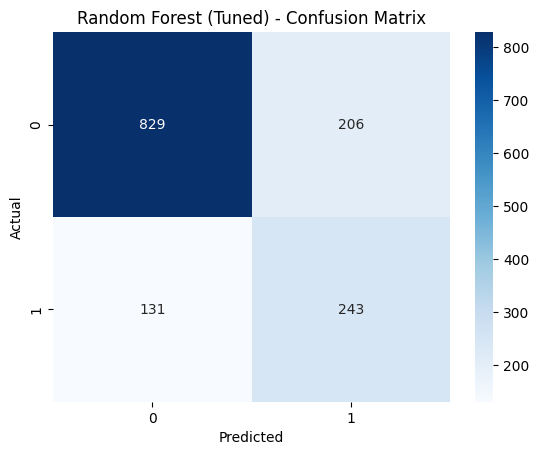


📌 Logistic Regression (Tuned) Results:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1035
           1       0.50      0.69      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.75      1409



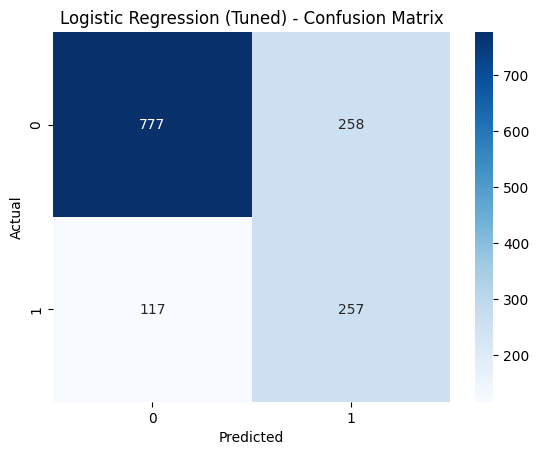


📌 XGBoost (Tuned) Results:
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1035
           1       0.53      0.66      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.75      0.76      1409



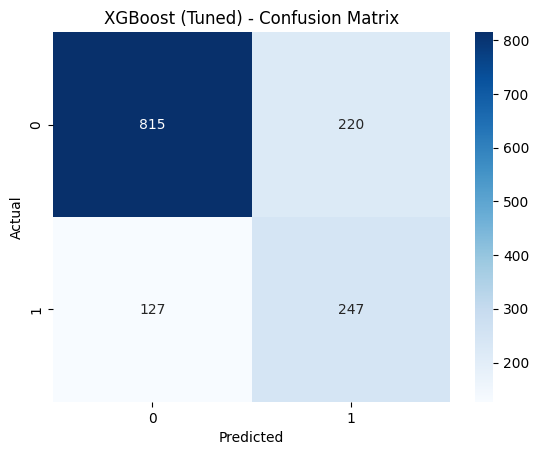

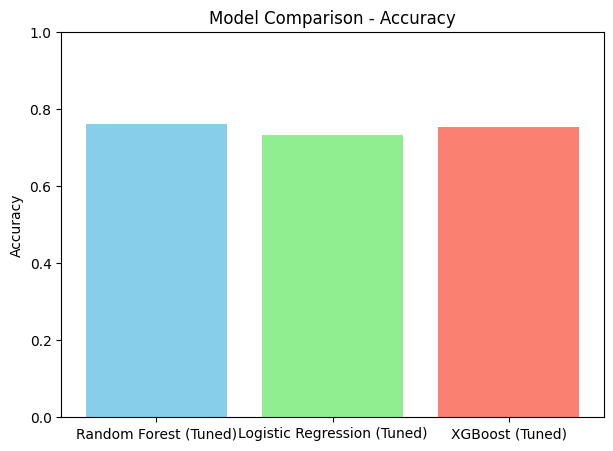

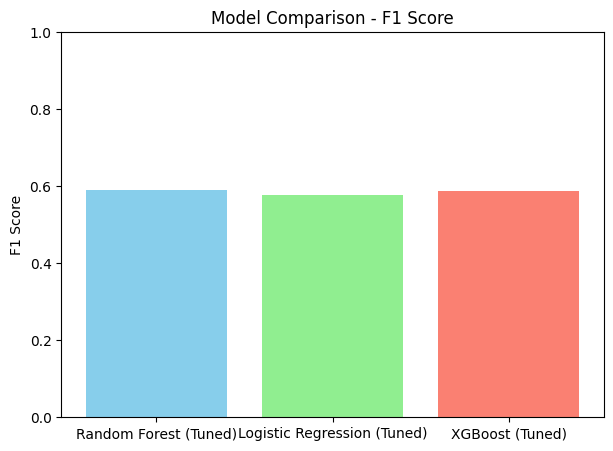

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assign tuned models properly
best_rf = rf_random.best_estimator_
best_lr = grid_log.best_estimator_
best_xgb = grid_xgb.best_estimator_

# --- Evaluate All Tuned Models ---

models = {
    "Random Forest (Tuned)": best_rf,
    "Logistic Regression (Tuned)": best_lr,
    "XGBoost (Tuned)": best_xgb
}

results = {}

for name, model in models.items():
    print(f"\n📌 {name} Results:")
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "F1 Score": f1}
    
    # Detailed report
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Compare Models in a Bar Chart ---
metrics = ["Accuracy", "F1 Score"]

for metric in metrics:
    plt.figure(figsize=(7,5))
    plt.bar(results.keys(), [results[m][metric] for m in results], color=['skyblue','lightgreen','salmon'])
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.ylim(0,1)
    plt.show()


<u> Observations: </u>

- Accuracy: Random Forest (0.76) slightly leads, but all are close.

- Recall (Churn customers): Logistic Regression (0.69) performs best — this is very important because recall tells us how many churners we successfully catch.

- F1-Score (Churn customers): All three are close (0.58–0.59), showing balance between precision & recall.

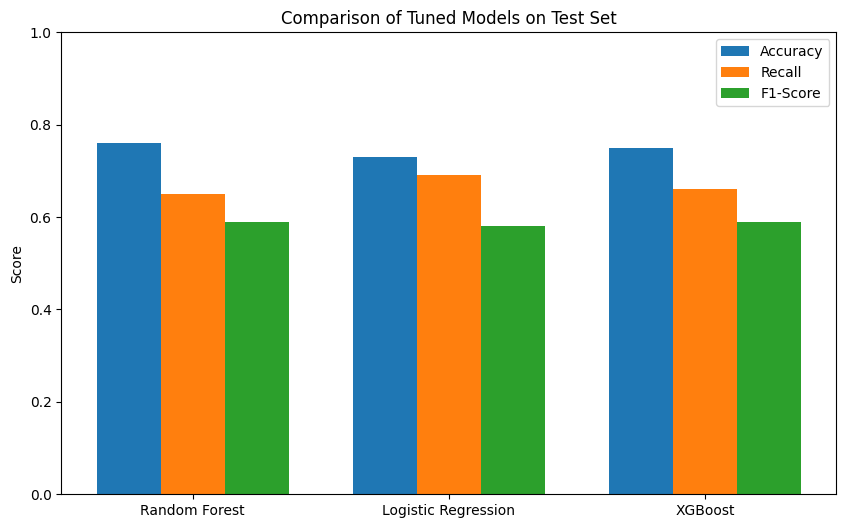

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Logistic Regression', 'XGBoost']

# Metrics (from your results)
accuracy_scores = [0.76, 0.73, 0.75]
recall_scores = [0.65, 0.69, 0.66]
f1_scores = [0.59, 0.58, 0.59]

# Plot
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, accuracy_scores, width, label='Accuracy')
plt.bar(x, recall_scores, width, label='Recall')
plt.bar(x + width, f1_scores, width, label='F1-Score')

plt.xticks(x, models)
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Comparison of Tuned Models on Test Set')
plt.legend()
plt.show()


### Step 10: Save & Load the Best Model for Deployment

In [57]:
import joblib

# Save the best Logistic Regression model
joblib.dump(best_lr, "best_model.pkl")

# Load it back when needed
loaded_model = joblib.load("best_model.pkl")

# Test loaded model with a sample prediction
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_pred)


Sample Predictions: [0 1 0 1 0]


### Deploy with Streamlit App

In [59]:
import streamlit as st
import numpy as np
import joblib

# Load your tuned model (replace with the best one you saved, e.g. XGBoost)
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Customer Churn Prediction", layout="centered")
st.title("📊 Customer Churn Prediction App")
st.write("Enter customer details below to predict churn probability.")

# --- Input Fields ---
# Replace these with your dataset’s actual features
col1, col2 = st.columns(2)

with col1:
    tenure = st.number_input("Tenure (months)", min_value=0, max_value=100, value=12)
    monthly_charges = st.number_input("Monthly Charges", min_value=0.0, max_value=500.0, value=50.0)
    total_charges = st.number_input("Total Charges", min_value=0.0, value=600.0)
    
with col2:
    gender = st.selectbox("Gender", ["Male", "Female"])
    partner = st.selectbox("Partner", ["Yes", "No"])
    dependents = st.selectbox("Dependents", ["Yes", "No"])

# More categorical fields (example placeholders, add as per your dataset)
phone_service = st.selectbox("Phone Service", ["Yes", "No"])
internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])
payment_method = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Credit card", "Bank transfer"])

# --- Encode categorical values ---
def encode_inputs():
    gender_val = 1 if gender == "Male" else 0
    partner_val = 1 if partner == "Yes" else 0
    dependents_val = 1 if dependents == "Yes" else 0
    phone_service_val = 1 if phone_service == "Yes" else 0

    internet_map = {"DSL": 0, "Fiber optic": 1, "No": 2}
    contract_map = {"Month-to-month": 0, "One year": 1, "Two year": 2}
    payment_map = {"Electronic check": 0, "Mailed check": 1, "Credit card": 2, "Bank transfer": 3}

    internet_val = internet_map[internet_service]
    contract_val = contract_map[contract]
    payment_val = payment_map[payment_method]

    return np.array([[tenure, monthly_charges, total_charges,
                      gender_val, partner_val, dependents_val,
                      phone_service_val, internet_val,
                      contract_val, payment_val]])

# --- Prediction ---
if st.button("🔮 Predict Churn"):
    features = encode_inputs()
    prediction = model.predict(features)[0]
    prob = model.predict_proba(features)[0][1]

    if prediction == 1:
        st.error(f"⚠️ Customer is **likely to churn** (Probability: {prob:.2f})")
    else:
        st.success(f"✅ Customer will **stay** (Probability: {prob:.2f})")


2025-08-17 00:31:03.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 00:31:03.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [65]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
